In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import json
import sys 
#sys.path.append("...") # go to parent dir
from os.path import exists
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import exists

 # Summary


This notebook extracts sleep scores and physical activity data from a cohort of participants and plots the results based on their weight category.

# Sleep data from Fitbit

In [24]:
sleep_data = pd.read_csv('sleep_data_2022_12_01.csv') 

In [25]:
len(sleep_data)

37

In [26]:
column_names = ["study_ID","age","age_cat","sex","BMI","BMI_cat","Cortisol", "Sleep apnoea"]
len(column_names)

8

In [27]:
sleep_reduced = sleep_data[column_names]

In [28]:
sleep_reduced.insert(len(column_names),'overall_score',"")
sleep_reduced.insert(len(column_names)+1,'revitalization_score',"")
sleep_reduced.insert(len(column_names)+2,'duration_score',"")
sleep_reduced.insert(len(column_names)+3,'deep_sleep_in_minutes',"")
sleep_reduced.insert(len(column_names)+4,'resting_heart_rate',"")
sleep_reduced.insert(len(column_names)+5,'avg_SpO2',"")
sleep_reduced.insert(len(column_names)+6,'lower_SpO2',"")
sleep_reduced.insert(len(column_names)+7,'upper_SpO2',"")

In [29]:
for i in range(sleep_reduced.shape[0]):
    tmp_name='Sleep/' + str(sleep_reduced['study_ID'][i])+'_sleep_score.csv'
    tmp_name_spO2 = 'Sleep/' + str(sleep_reduced['study_ID'][i])+'_SpO2.csv'
    
    if exists(tmp_name):
        data=pd.read_csv(tmp_name)
        
    else:
        sleep_reduced['overall_score'][i] = np.nan
        sleep_reduced['revitalization_score'][i] = np.nan
        sleep_reduced['duration_score'][i] = np.nan
        sleep_reduced['deep_sleep_in_minutes'][i] = np.nan
        sleep_reduced['resting_heart_rate'][i] = np.nan
        
    if exists(tmp_name_spO2):
        spo2=pd.read_csv(tmp_name_spO2)
        
        spo2_avg = sum(spo2['average_value'])/len(spo2['average_value'])
        spo2_min = min(spo2['lower_bound'])
        spo2_max = max(spo2['upper_bound'])
        
        sleep_reduced['avg_SpO2'][i] = round(spo2_avg, 2)
        sleep_reduced['lower_SpO2'][i] = spo2_min
        sleep_reduced['upper_SpO2'][i] = spo2_max
    else:
        print(tmp_name_spO2 + " doesn't exist")
        sleep_reduced['avg_SpO2'][i] = np.nan
        sleep_reduced['lower_SpO2'][i] = np.nan
        sleep_reduced['upper_SpO2'][i] = np.nan
            
    if len(data['overall_score'])==0:
        print(tmp_name + ' empty')
        sleep_reduced['overall_score'][i] = np.nan
        sleep_reduced['revitalization_score'][i] = np.nan
        sleep_reduced['duration_score'][i] = np.nan
        sleep_reduced['deep_sleep_in_minutes'][i] = np.nan
        sleep_reduced['resting_heart_rate'][i] = np.nan
    else:
        overall_score_avg = sum(data['overall_score'])/len(data['overall_score'])
        revitalization_avg = sum(data['revitalization_score'])/len(data['revitalization_score'])
        duration_avg = sum(data['duration_score'])/len(data['duration_score'])
        deep_avg = sum(data['deep_sleep_in_minutes'])/len(data['deep_sleep_in_minutes'])
        resting_avg = sum(data['resting_heart_rate'])/len(data['resting_heart_rate'])
        
        sleep_reduced['overall_score'][i] = round(overall_score_avg, 2)
        sleep_reduced['revitalization_score'][i] = round(revitalization_avg, 2)
        sleep_reduced['duration_score'][i] = round(duration_avg, 2)
        sleep_reduced['deep_sleep_in_minutes'][i] = round(deep_avg, 2)
        sleep_reduced['resting_heart_rate'][i] = round(resting_avg, 2)

Sleep/1004_SpO2.csv doesn't exist
Sleep/1005_SpO2.csv doesn't exist
Sleep/1008_SpO2.csv doesn't exist
Sleep/1009_SpO2.csv doesn't exist
Sleep/1010_SpO2.csv doesn't exist
Sleep/1018_SpO2.csv doesn't exist
Sleep/1020_sleep_score.csv empty
Sleep/1022_SpO2.csv doesn't exist
Sleep/2014_SpO2.csv doesn't exist
Sleep/2014_sleep_score.csv empty
Sleep/2016_SpO2.csv doesn't exist
Sleep/2018_SpO2.csv doesn't exist
Sleep/2019_SpO2.csv doesn't exist
Sleep/2022_SpO2.csv doesn't exist
Sleep/3004_SpO2.csv doesn't exist
Sleep/3005_SpO2.csv doesn't exist
Sleep/3006_SpO2.csv doesn't exist
Sleep/3008_SpO2.csv doesn't exist
Sleep/3009_SpO2.csv doesn't exist
Sleep/3010_SpO2.csv doesn't exist
Sleep/3010_sleep_score.csv empty
Sleep/3011_SpO2.csv doesn't exist
Sleep/3013_SpO2.csv doesn't exist
Sleep/3016_SpO2.csv doesn't exist
Sleep/3021_SpO2.csv doesn't exist
Sleep/3026_SpO2.csv doesn't exist
Sleep/3029_SpO2.csv doesn't exist
Sleep/3030_SpO2.csv doesn't exist
Sleep/3030_sleep_score.csv empty


In [30]:
sleep_apnoea=sleep_reduced[sleep_reduced['Sleep apnoea']=='Yes']

In [31]:
sleep_obese = sleep_reduced[sleep_reduced['BMI_cat']=='Obese']
sleep_over = sleep_reduced[sleep_reduced['BMI_cat']=='Overweight']
sleep_normal = sleep_reduced[sleep_reduced['BMI_cat']=='Normal Weight']
sleep_under = sleep_reduced[sleep_reduced['BMI_cat']=='Underweight']


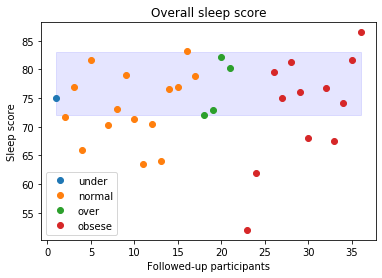

In [32]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['overall_score'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['overall_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['overall_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['overall_score'], 'o')

plt.fill_between(x, 72, 83, facecolor="orange", color='blue', alpha=0.1) 
            
plt.title("Overall sleep score")
plt.xlabel("Followed-up participants")
plt.ylabel('Sleep score') 
plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('overall_sleep_score.png',dpi = 400, bbox_inches='tight')
plt.show()

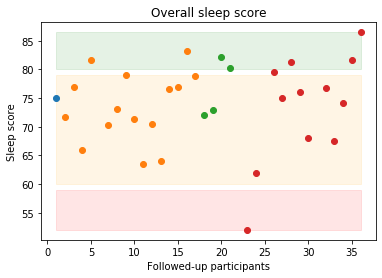

In [35]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['overall_score'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['overall_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['overall_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['overall_score'], 'o')

plt.fill_between(x, 80, max(sleep_reduced['overall_score']), # Most people in the general population get a score between 72 and 83
                 facecolor="orange", # The fill color
                 color='green',       # The outline color
                 alpha=0.1) 
plt.fill_between(x, 60, 79, # Most people in the general population get a score between 72 and 83
                 facecolor="orange", # The fill color
                 color='orange',       # The outline color
                 alpha=0.1) 
plt.fill_between(x, min(sleep_reduced['overall_score']), 59, # Most people in the general population get a score between 72 and 83
                 facecolor="orange", # The fill color
                 color='red',       # The outline color
                 alpha=0.1) 


plt.title("Overall sleep score")
plt.xlabel("Followed-up participants")
plt.ylabel('Sleep score') 
# plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('overall_sleep_score2.png',dpi = 400, bbox_inches='tight')
plt.show()

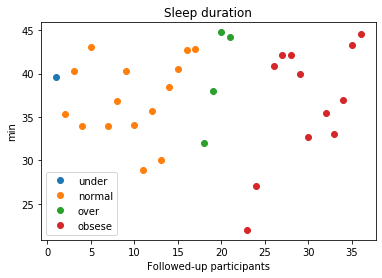

In [43]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['duration_score'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['duration_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['duration_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['duration_score'], 'o')

plt.title("Sleep duration")
plt.xlabel("Followed-up participants")
plt.ylabel('min')
plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('duration_score.png',dpi = 400, bbox_inches='tight')
plt.show()

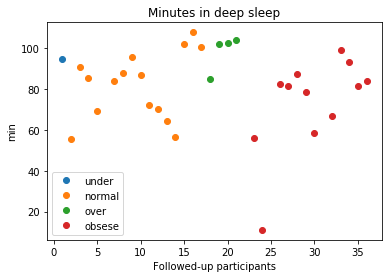

In [44]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['deep_sleep_in_minutes'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['deep_sleep_in_minutes'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['deep_sleep_in_minutes'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['deep_sleep_in_minutes'], 'o')

plt.title("Minutes in deep sleep")
plt.xlabel("Followed-up participants")
plt.ylabel('min')
plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('deep_sleep_in_minutes.png',dpi = 400, bbox_inches='tight')
plt.show()


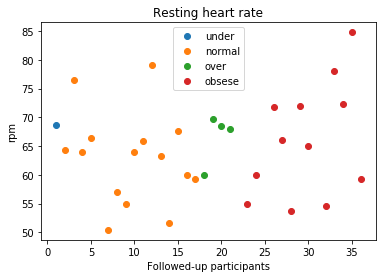

In [45]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['resting_heart_rate'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['resting_heart_rate'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['resting_heart_rate'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['resting_heart_rate'], 'o')

plt.title("Resting heart rate")
plt.xlabel("Followed-up participants")
plt.ylabel('rpm') 
plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('resting_heart_rate.png',dpi = 400, bbox_inches='tight')
plt.show()


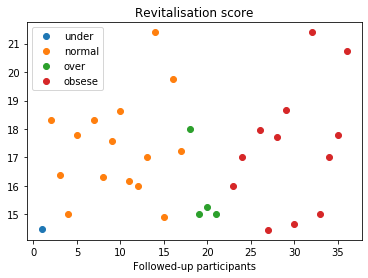

In [39]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['revitalization_score'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['revitalization_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['revitalization_score'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['revitalization_score'], 'o')

plt.title("Revitalisation score")
plt.xlabel("Followed-up participants")
# plt.ylabel('rpm') 
plt.legend(['under', 'normal','over','obsese'])
# plt.savefig('revitalization_score.png',dpi = 400, bbox_inches='tight')
plt.show()

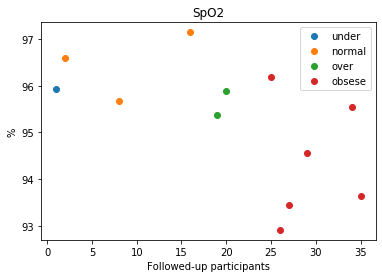

In [41]:
x = list(range(1, len(sleep_reduced)))

plt.plot(x[0:len(sleep_under)],sleep_under['avg_SpO2'], 'o')
plt.plot(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['avg_SpO2'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['avg_SpO2'], 'o')
plt.plot(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['avg_SpO2'], 'o')

plt.title("SpO2")
plt.xlabel("Followed-up participants")
plt.ylabel('%') 
plt.legend(['under', 'normal','over','obsese'])
plt.savefig('SpO2.png',dpi = 400, bbox_inches='tight')
plt.show()


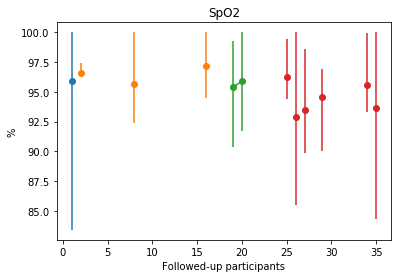

In [42]:
x = list(range(1, len(sleep_reduced)))

plt.errorbar(x[0:len(sleep_under)],sleep_under['avg_SpO2'],yerr=[sleep_under['avg_SpO2']-sleep_under['lower_SpO2'],sleep_under['upper_SpO2']-sleep_under['avg_SpO2']], marker='o')
plt.errorbar(x[len(sleep_under):len(sleep_under)+len(sleep_normal)],sleep_normal['avg_SpO2'], yerr=[sleep_normal['avg_SpO2']-sleep_normal['lower_SpO2'],sleep_normal['upper_SpO2']-sleep_normal['avg_SpO2']], marker='o')
plt.errorbar(x[len(sleep_under)+len(sleep_normal):len(sleep_under)+len(sleep_normal)+len(sleep_over)],sleep_over['avg_SpO2'], yerr=[sleep_over['avg_SpO2']-sleep_over['lower_SpO2'],sleep_over['upper_SpO2']-sleep_over['avg_SpO2']], marker='o')
plt.errorbar(x[len(sleep_under)+len(sleep_normal)+len(sleep_over):len(sleep_under)+len(sleep_normal)+len(sleep_over)+len(sleep_obese)],sleep_obese['avg_SpO2'], yerr=[sleep_obese['avg_SpO2']-sleep_obese['lower_SpO2'],sleep_obese['upper_SpO2']-sleep_obese['avg_SpO2']], marker='o',ls='none')

plt.title("SpO2")
plt.xlabel("Followed-up participants")
plt.ylabel('%') 
# plt.legend(['under', 'normal','over','obsese'])
plt.savefig('SpO2_2.png',dpi = 400, bbox_inches='tight')
plt.show()

# Steps data from Fitbit

In [46]:
sleep_steps_data = sleep_reduced.copy()

In [47]:
sleep_steps_data.insert(sleep_steps_data.shape[1],'steps',"")

In [54]:
current_directory = os.getcwd()

In [57]:
steps_dir = current_directory+"/Steps"

In [59]:
for i in range(sleep_steps_data.shape[0]):
    tmp_name=str(sleep_steps_data['study_ID'][i])+'_steps'
    steps_files = [filename for filename in os.listdir(steps_dir) if filename.startswith(tmp_name)]    
    if len(steps_files)>1:
        for j in range(len(steps_files)):
            a_path =steps_dir + '/' + steps_files[j]
            temp = pd.DataFrame()
            dfs = []
            steps_data = pd.read_json(a_path, convert_dates=True) #pd.read_json(steps_files[i]) # read data frame from json file
            dfs.append(steps_data) # append the data frame to the list
        temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.
        temp.to_csv('all_' + tmp_name + '.csv', index=False)
    elif len(steps_files)==0:
        pass
    else:
        a_path =steps_dir + '/' + steps_files[0]
        steps_data = pd.read_json(a_path)#pd.read_json(steps_files[i])
        steps_data.to_csv('all_' + tmp_name + '.csv', index=False)


In [62]:
for i in range(sleep_steps_data['study_ID'].shape[0]):
    tmp_name = 'all_' + str(sleep_steps_data['study_ID'][i])+'_steps.csv'
    date_cols = ['dateTime']
    steps_data = pd.read_csv(tmp_name,  parse_dates=date_cols)
    delta = steps_data['dateTime'][steps_data.shape[0]-1].date()-steps_data['dateTime'][0].date()
    num_days = delta.days
    if num_days >0:
        sleep_steps_data['steps'][i] = np.sum(steps_data['value'])/num_days
    else:
        sleep_steps_data['steps'][i] = np.sum(steps_data['value'])/1

In [65]:
steps_obese=sleep_steps_data[sleep_steps_data['BMI_cat']=='Obese']
steps_over=sleep_steps_data[sleep_steps_data['BMI_cat']=='Overweight']
steps_normal=sleep_steps_data[sleep_steps_data['BMI_cat']=='Normal Weight']
steps_under=sleep_steps_data[sleep_steps_data['BMI_cat']=='Underweight']

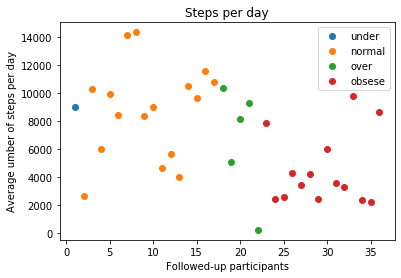

In [67]:
x = list(range(1, len(sleep_steps_data)))

plt.plot(x[0:len(steps_under)],steps_under['steps'], 'o')
plt.plot(x[len(steps_under):len(steps_under)+len(steps_normal)],steps_normal['steps'], 'o')
plt.plot(x[len(steps_under)+len(steps_normal):len(steps_under)+len(steps_normal)+len(steps_over)],steps_over['steps'], 'o')
plt.plot(x[len(steps_under)+len(steps_normal)+len(steps_over):len(steps_under)+len(steps_normal)+len(steps_over)+len(steps_obese)],steps_obese['steps'], 'o')

# plt.fill_between(x, 72, 83, facecolor="orange", color='blue', alpha=0.1) 
            
plt.title("Steps per day")
plt.xlabel("Followed-up participants")
plt.ylabel('Average umber of steps per day') 
plt.legend(['under', 'normal','over','obsese'])
plt.savefig('steps_average.png',dpi = 400, bbox_inches='tight')
plt.show()